IMPORT DEPENDENCIES

In [140]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
import pandas as pd
import momepy as mp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import nx_altair as nxa
import shapely.geometry as geom
from itertools import islice
from collections import Counter

In [141]:
place_name = "Manhattan Island, New York, United States"
G = ox.graph_from_place(place_name, network_type= 'drive', simplify = True)

In [142]:
area = ox.geocode_to_gdf(place_name)

EVICTION GRAPH

In [143]:
#Load eviction data and filter data for Manhattan only
eviction_data = open(r"C:\Users\jfoo\Desktop\MACAD\03_AIA\01_GRAPHML\AIA-GML-James-Andres\Data\Evictions_20240516.csv")
eviction_df = pd.read_csv(eviction_data)
manhattan_evictions = eviction_df[eviction_df['BOROUGH'] == 'MANHATTAN']
clean_evictions = manhattan_evictions.dropna(subset = 'Latitude')

In [144]:
geometry = gpd.points_from_xy(clean_evictions['Longitude'], clean_evictions['Latitude'])
manhattan_evictions_gdf = gpd.GeoDataFrame(clean_evictions, geometry= geometry)
manhattan_evictions_gdf.set_crs(epsg= 4326)

Court Index Number  Docket Number               Eviction Address  \
3               74670/16           61667        535 WEST 110TH STREE T   
10             311118/22            6085  2915 FREDERICK DOUGLASS BLVD   
14              59878/19           18419        620 WEST 172ND STREE T   
36              82266/16            9013              220 CABRINI BLVD   
39             N60311/19           97948        267 WEST 146TH STREE T   
...                  ...             ...                           ...   
91169           21087/18           34034             442 EAST 105TH ST   
91195          080658/17           80051         106-108 WEST 109TH ST   
91196           65769/19          357421          243 EAST 83RD STREET   
91197           65769/19          357421          243 EAST 83RD STREET   
91199          310455/23          121412            214 AUDUBON AVENUE   

      Eviction Apartment Number Executed Date Marshal First Name  \
3                            3A    05/04/2017             Justin   
10                           4C    03/05/2024              David   
14                           4A    08/13/2019             George   
36                           3D    01/30/2018             George   
39                           16    10/03/2019             Ileana   
...                         ...           ...                ...   
91169                       05B    05/07/2019              Bruce   
91195                        3C    03/02/2018              Henry   
91196                        5C    12/12/2019             Thomas   
91197                        5C    12/12/2019             Thomas   
91199                        46    10/05/2023             Justin   

      Marshal Last Name Residential/Commercial    BOROUGH  Eviction Postcode  \
3              Grossman            Residential  MANHATTAN              10025   
10                Smith            Residential  MANHATTAN              10039   
14          Essock, Jr.            Residential  MANHATTAN              10032   
36          Essock, Jr.            Residential  MANHATTAN              10033   
39               Rivera            Residential  MANHATTAN              10039   
...                 ...                    ...        ...                ...   
91169              Kemp            Residential  MANHATTAN              10029   
91195             Daley            Residential  MANHATTAN              10025   
91196               Bia            Residential  MANHATTAN              10028   
91197               Bia            Residential  MANHATTAN              10028   
91199          Grossman            Residential  MANHATTAN              10033   

       ... Eviction/Legal Possession   Latitude  Longitude  Community Board  \
3      ...                Possession  40.803795 -73.965797              9.0   
10     ...                Possession  40.828736 -73.937611             10.0   
14     ...                Possession  40.844060 -73.939327             12.0   
36     ...                Possession  40.854901 -73.938490             12.0   
39     ...                Possession  40.823075 -73.940380             10.0   
...    ...                       ...        ...        ...              ...   
91169  ...                  Eviction  40.788265 -73.938952             11.0   
91195  ...                Possession  40.801398 -73.962010              7.0   
91196  ...                Possession  40.776451 -73.954395              8.0   
91197  ...                Possession  40.776451 -73.954395              8.0   
91199  ...                Possession  40.845364 -73.934812             12.0   

       Council District  Census Tract        BIN           BBL  \
3                   7.0         199.0  1056904.0  1.018820e+09   
10                  9.0       23502.0  1060897.0  1.020470e+09   
14                 10.0         253.0  1063486.0  1.021420e+09   
36                 10.0         275.0  1064369.0  1.021790e+09   
39                  9.0         234.0  1060499.0  1.020320e+

In [145]:
eviction_gdf_points = manhattan_evictions_gdf[manhattan_evictions_gdf['geometry'].type == 'Point']
eviction_gdf_points.head()

Court Index Number  Docket Number               Eviction Address  \
3            74670/16           61667        535 WEST 110TH STREE T   
10          311118/22            6085  2915 FREDERICK DOUGLASS BLVD   
14           59878/19           18419        620 WEST 172ND STREE T   
36           82266/16            9013              220 CABRINI BLVD   
39          N60311/19           97948        267 WEST 146TH STREE T   

   Eviction Apartment Number Executed Date Marshal First Name  \
3                         3A    05/04/2017             Justin   
10                        4C    03/05/2024              David   
14                        4A    08/13/2019             George   
36                        3D    01/30/2018             George   
39                        16    10/03/2019             Ileana   

   Marshal Last Name Residential/Commercial    BOROUGH  Eviction Postcode  \
3           Grossman            Residential  MANHATTAN              10025   
10             Smith            Residential  MANHATTAN              10039   
14       Essock, Jr.            Residential  MANHATTAN              10032   
36       Essock, Jr.            Residential  MANHATTAN              10033   
39            Rivera            Residential  MANHATTAN              10039   

    ... Eviction/Legal Possession   Latitude  Longitude  Community Board  \
3   ...                Possession  40.803795 -73.965797              9.0   
10  ...                Possession  40.828736 -73.937611             10.0   
14  ...                Possession  40.844060 -73.939327             12.0   
36  ...                Possession  40.854901 -73.938490             12.0   
39  ...                Possession  40.823075 -73.940380             10.0   

    Council District  Census Tract        BIN           BBL  \
3                7.0         199.0  1056904.0  1.018820e+09   
10               9.0       23502.0  1060897.0  1.020470e+09   
14              10.0         253.0  1063486.0  1.021420e+09   
36              10.0         275.0  1064369.0  1.021790e+09   
39               9.0         234.0  1060499.0  1.020320e+09   

                                  NTA                    geometry  
3                 Morningside Heights  POINT (-73.96580 40.80380)  
10  Central Harlem North-Polo Grounds  POINT (-73.93761 40.82874)  
14           Washington Heights South  POINT (-73.93933 40.84406)  
36           Washington Heights North  POINT (-73.93849 40.85490)  
39  Central Harlem North-Polo Grounds  POINT (-73.94038 40.82308)  

[5 rows x 21 columns]

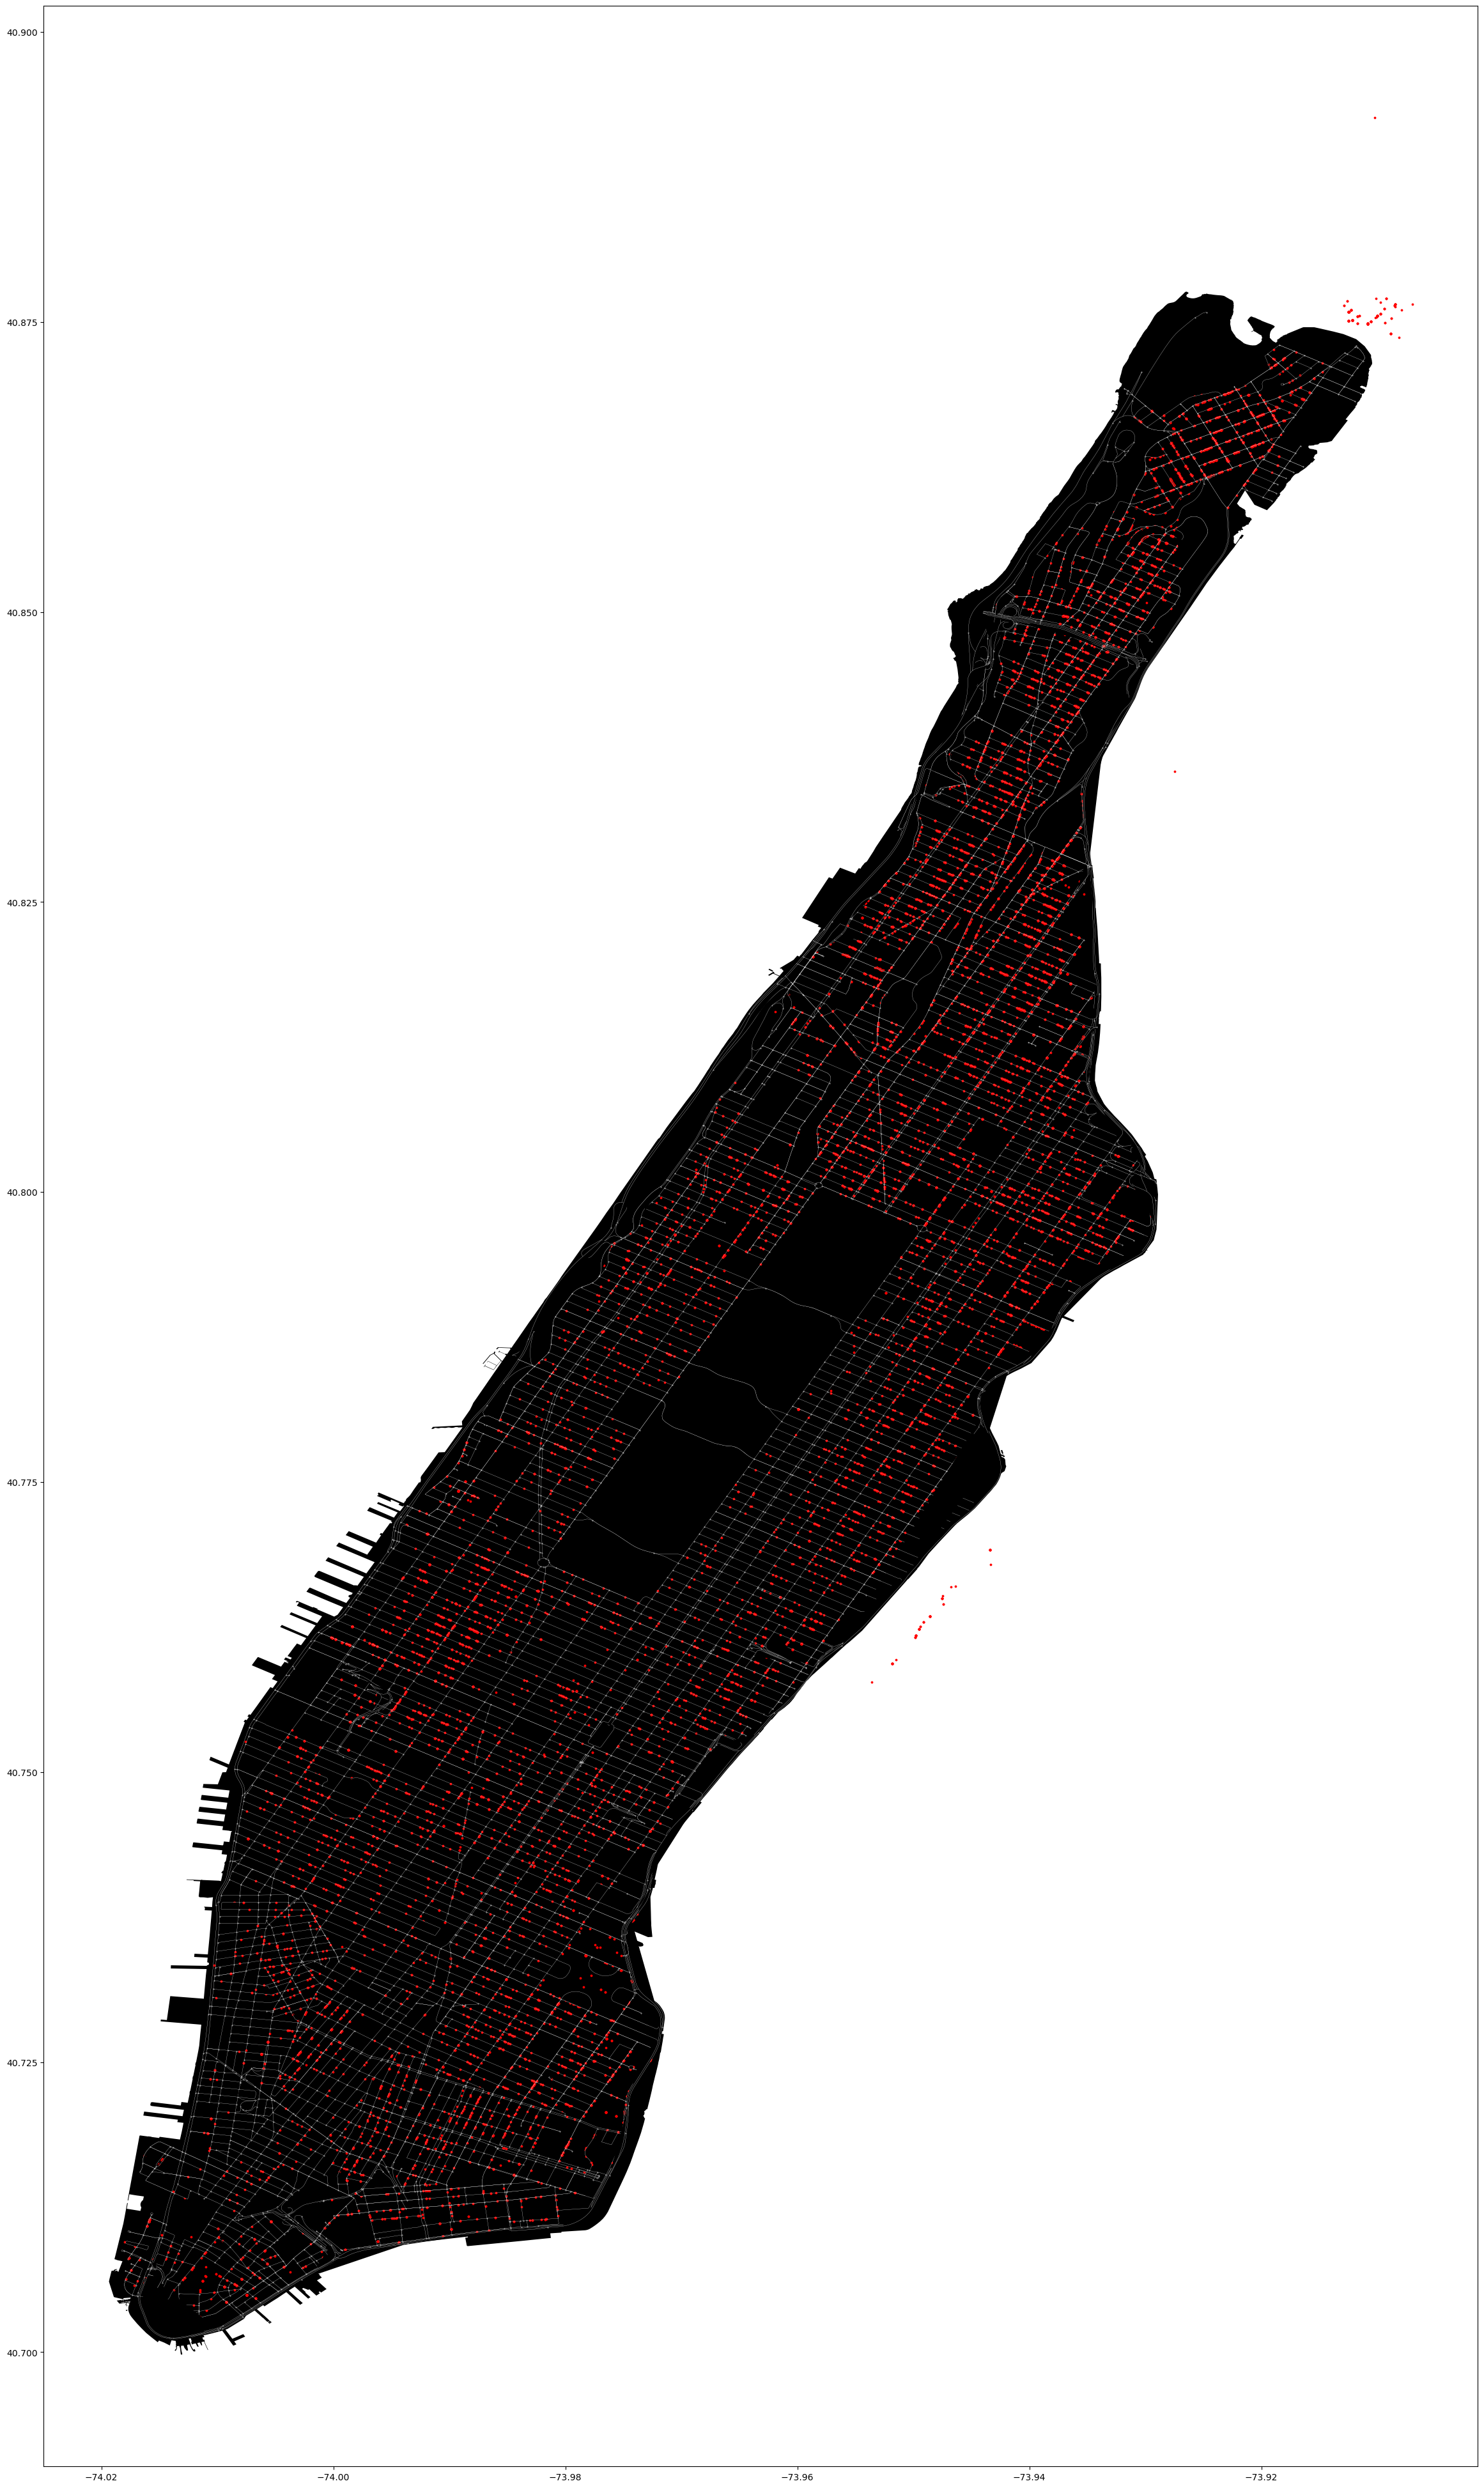

In [146]:
nodes, edges = ox.graph_to_gdfs(G)
fig, ax = plt.subplots(figsize=(30,50))
area.plot(ax = ax, facecolor = 'black')
edges.plot(ax = ax, linewidth = 0.2, edgecolor = 'white', facecolor = 'black')
nodes.plot(ax= ax, color = 'white', markersize = .1)
eviction_gdf_points.plot(ax= ax, markersize = 3, color = 'red')

plt.show()

In [147]:
close_edges = ox.distance.nearest_edges(G, eviction_gdf_points['geometry'].x, eviction_gdf_points['geometry'].y)
eviction_count = Counter(close_edges)

In [168]:
evictions = []

for i in edges.index:
    eviction = eviction_count[edges.loc[i].name]
    evictions.append(eviction)

max(evictions)
edges['evictions'] = evictions

(array([6.356e+03, 1.096e+03, 1.070e+03, 4.710e+02, 3.840e+02, 2.120e+02,
        8.500e+01, 1.900e+01, 3.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

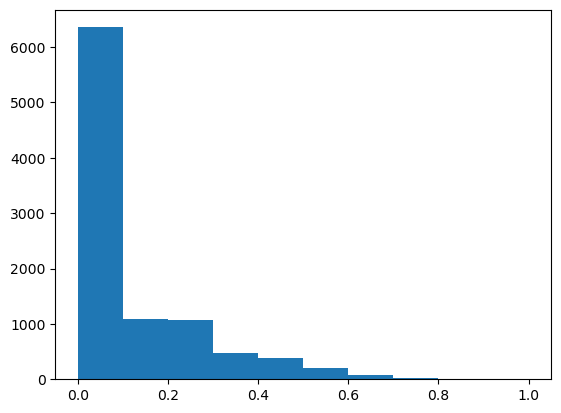

In [174]:
log_weights = np.log(edges['evictions']+1)
normalized_evictions = (log_weights - log_weights.min()) / (log_weights.max() - log_weights.min())
plt.hist(normalized_evictions)

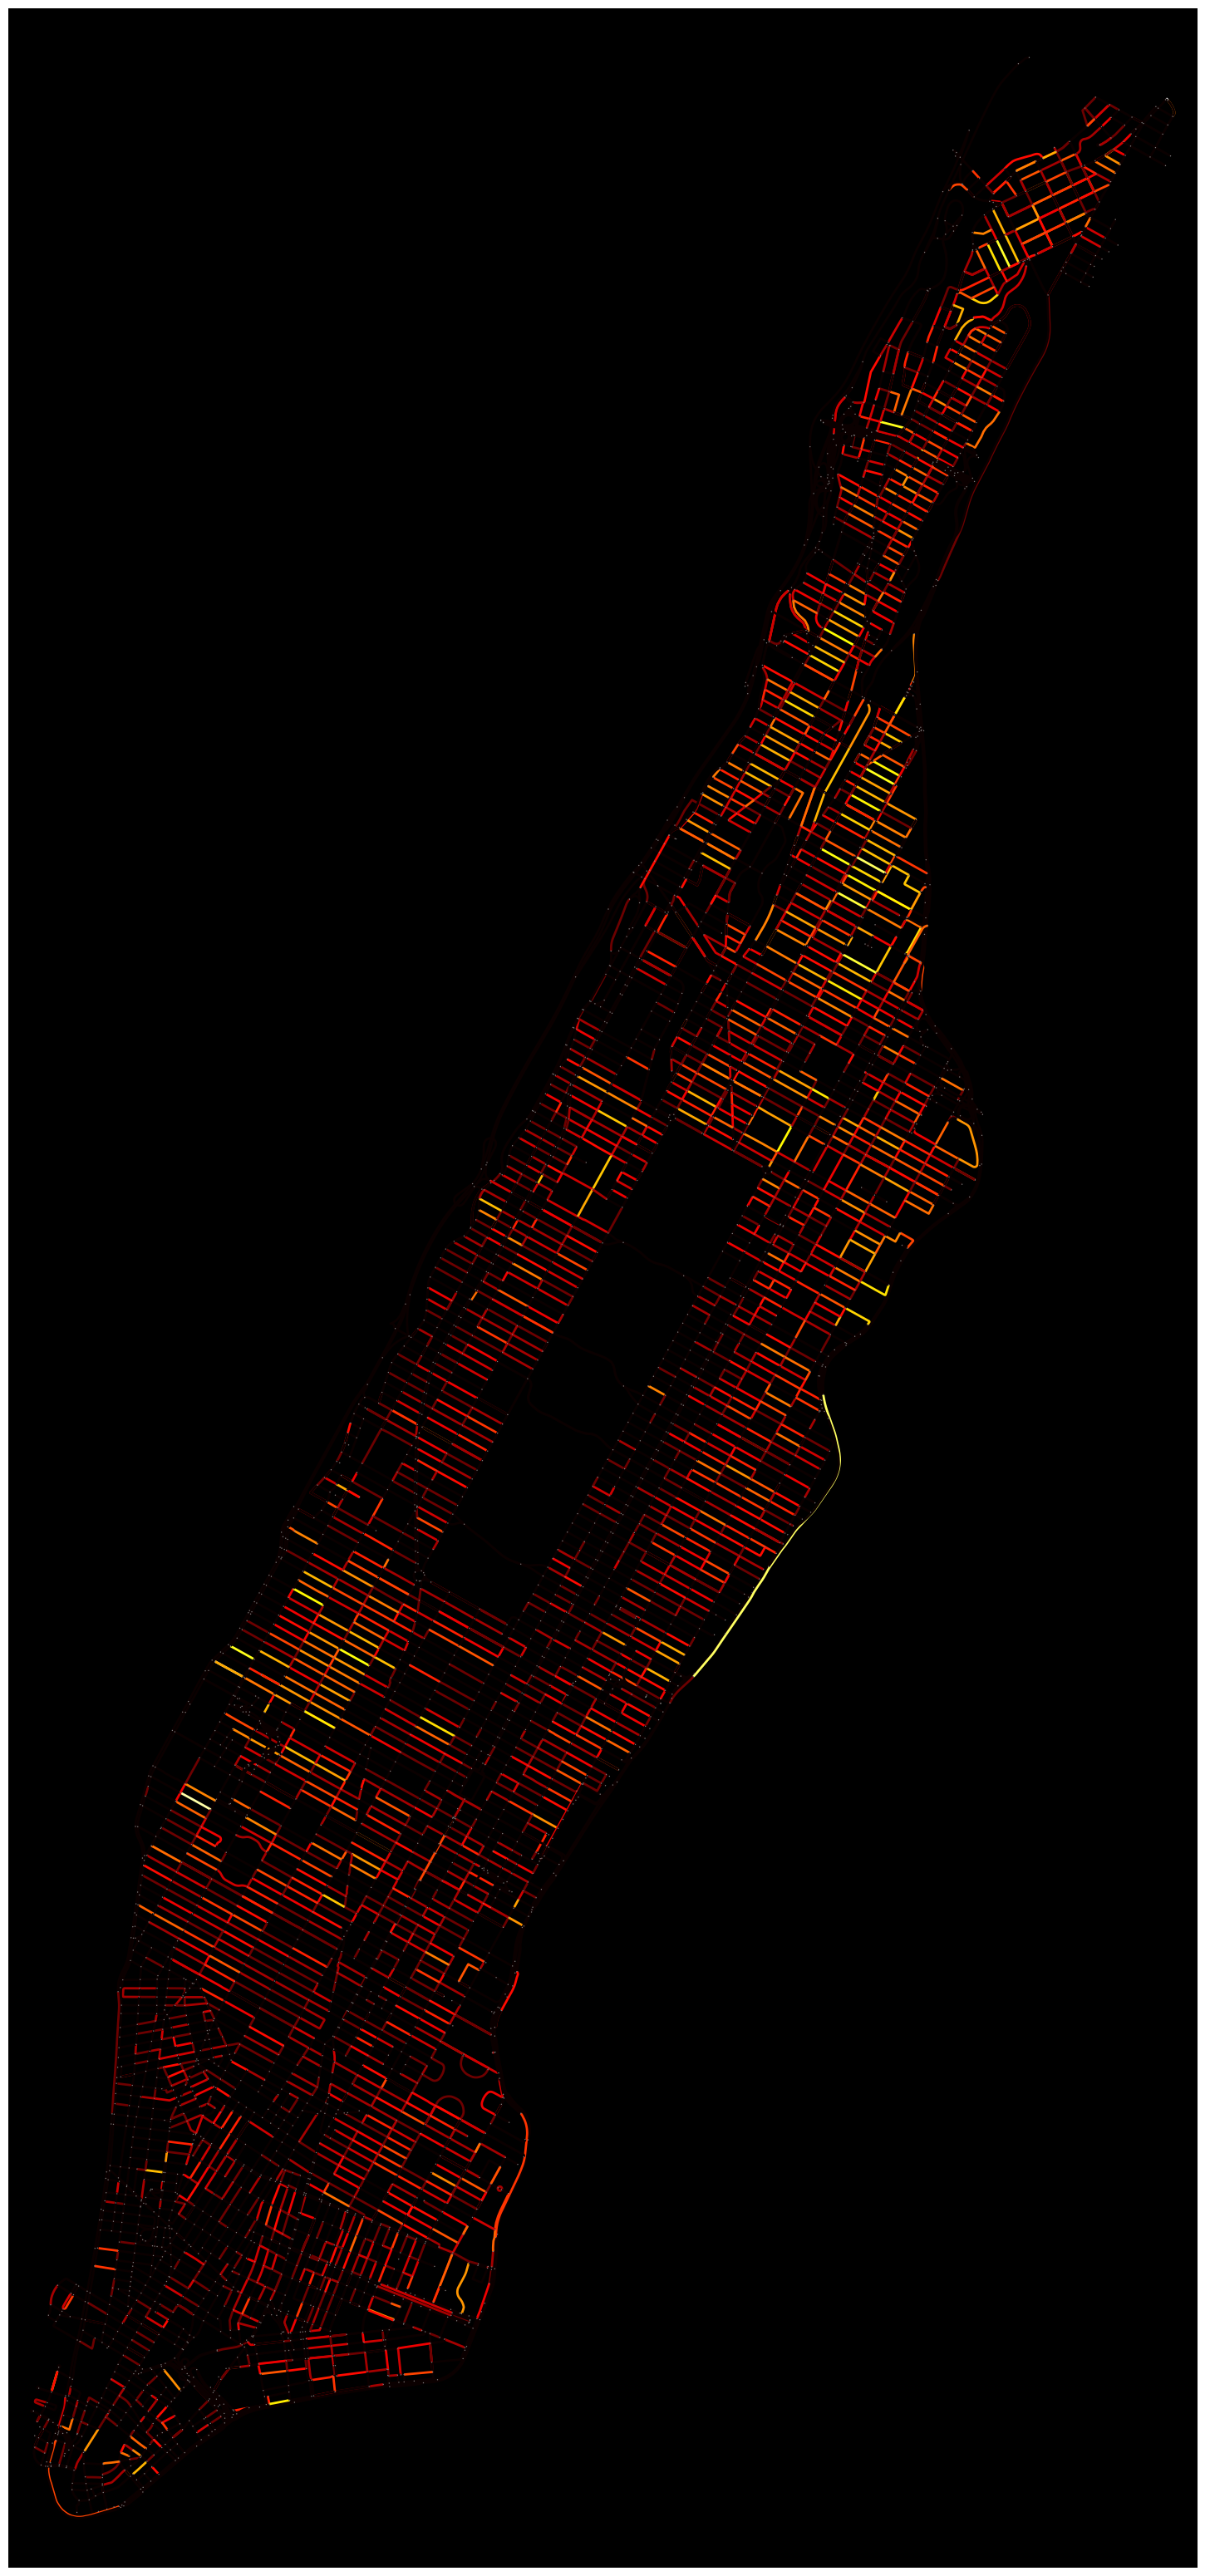

In [183]:
edges['normalized evictions'] = normalized_evictions

G = ox.graph_from_gdfs(nodes, edges)
ec = ox.plot.get_edge_colors_by_attr(G, attr = 'normalized evictions', cmap= 'hot')

fig, ax = ox.plot_graph(G, node_size=1, node_color = 'grey', edge_color=ec, edge_linewidth=2, figsize=(30,40), edge_alpha=1, bgcolor='black')

In [184]:
edges.head()

osmid               name  \
u        v        key                                                       
42421728 42435337 0                          195743153  Central Park West   
         42421731 0    [420625565, 420625573, 5668966]  West 106th Street   
         42432736 0           [1271523197, 1271523198]  Central Park West   
42435337 42437916 0                            5670640  West 105th Street   
         42421728 0                          195743153  Central Park West   

                           highway maxspeed  oneway reversed   length  \
u        v        key                                                   
42421728 42435337 0      secondary   25 mph   False     True   85.345   
         42421731 0      secondary        0   False    False  138.033   
         42432736 0      secondary   25 mph   False    False   86.274   
42435337 42437916 0    residential   25 mph    True    False  137.996   
         42421728 0      secondary   25 mph   False    False   85.345   

                                                                geometry  \
u        v        key                                                      
42421728 42435337 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...   
         42421731 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
         42432736 0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
42435337 42437916 0    LINESTRING (-73.96053 40.79738, -73.96065 40.7...   
         42421728 0    LINESTRING (-73.96053 40.79738, -73.96049 40.7...   

                       evictions lanes ref access junction bridge tunnel  \
u        v        key                                                      
42421728 42435337 0            0     0   0      0        0      0      0   
         42421731 0            3     0   0      0        0      0      0   
         42432736 0            1     0   0      0        0      0      0   
42435337 42437916 0            3     1   0      0        0      0      0   
         42421728 0            0     0   0      0        0      0      0   

                      width  Average Value  Normalized Average Value  \
u        v        key                                                  
42421728 42435337 0       0       0.000000                  0.000000   
         42421731 0       0  102010.825397                  0.544653   
         42432736 0       0  126037.125413                  0.554641   
42435337 42437916 0       0  107759.857143                  0.547243   
         42421728 0       0  146891.866887                  0.561873   

                       normalized evictions  
u        v        key                        
42421728 42435337 0                0.000000  
         42421731 0                0.294359  
         42432736 0                0.147180  
42435337 42437916 0                0.294359  
         42421728 0                0.000000

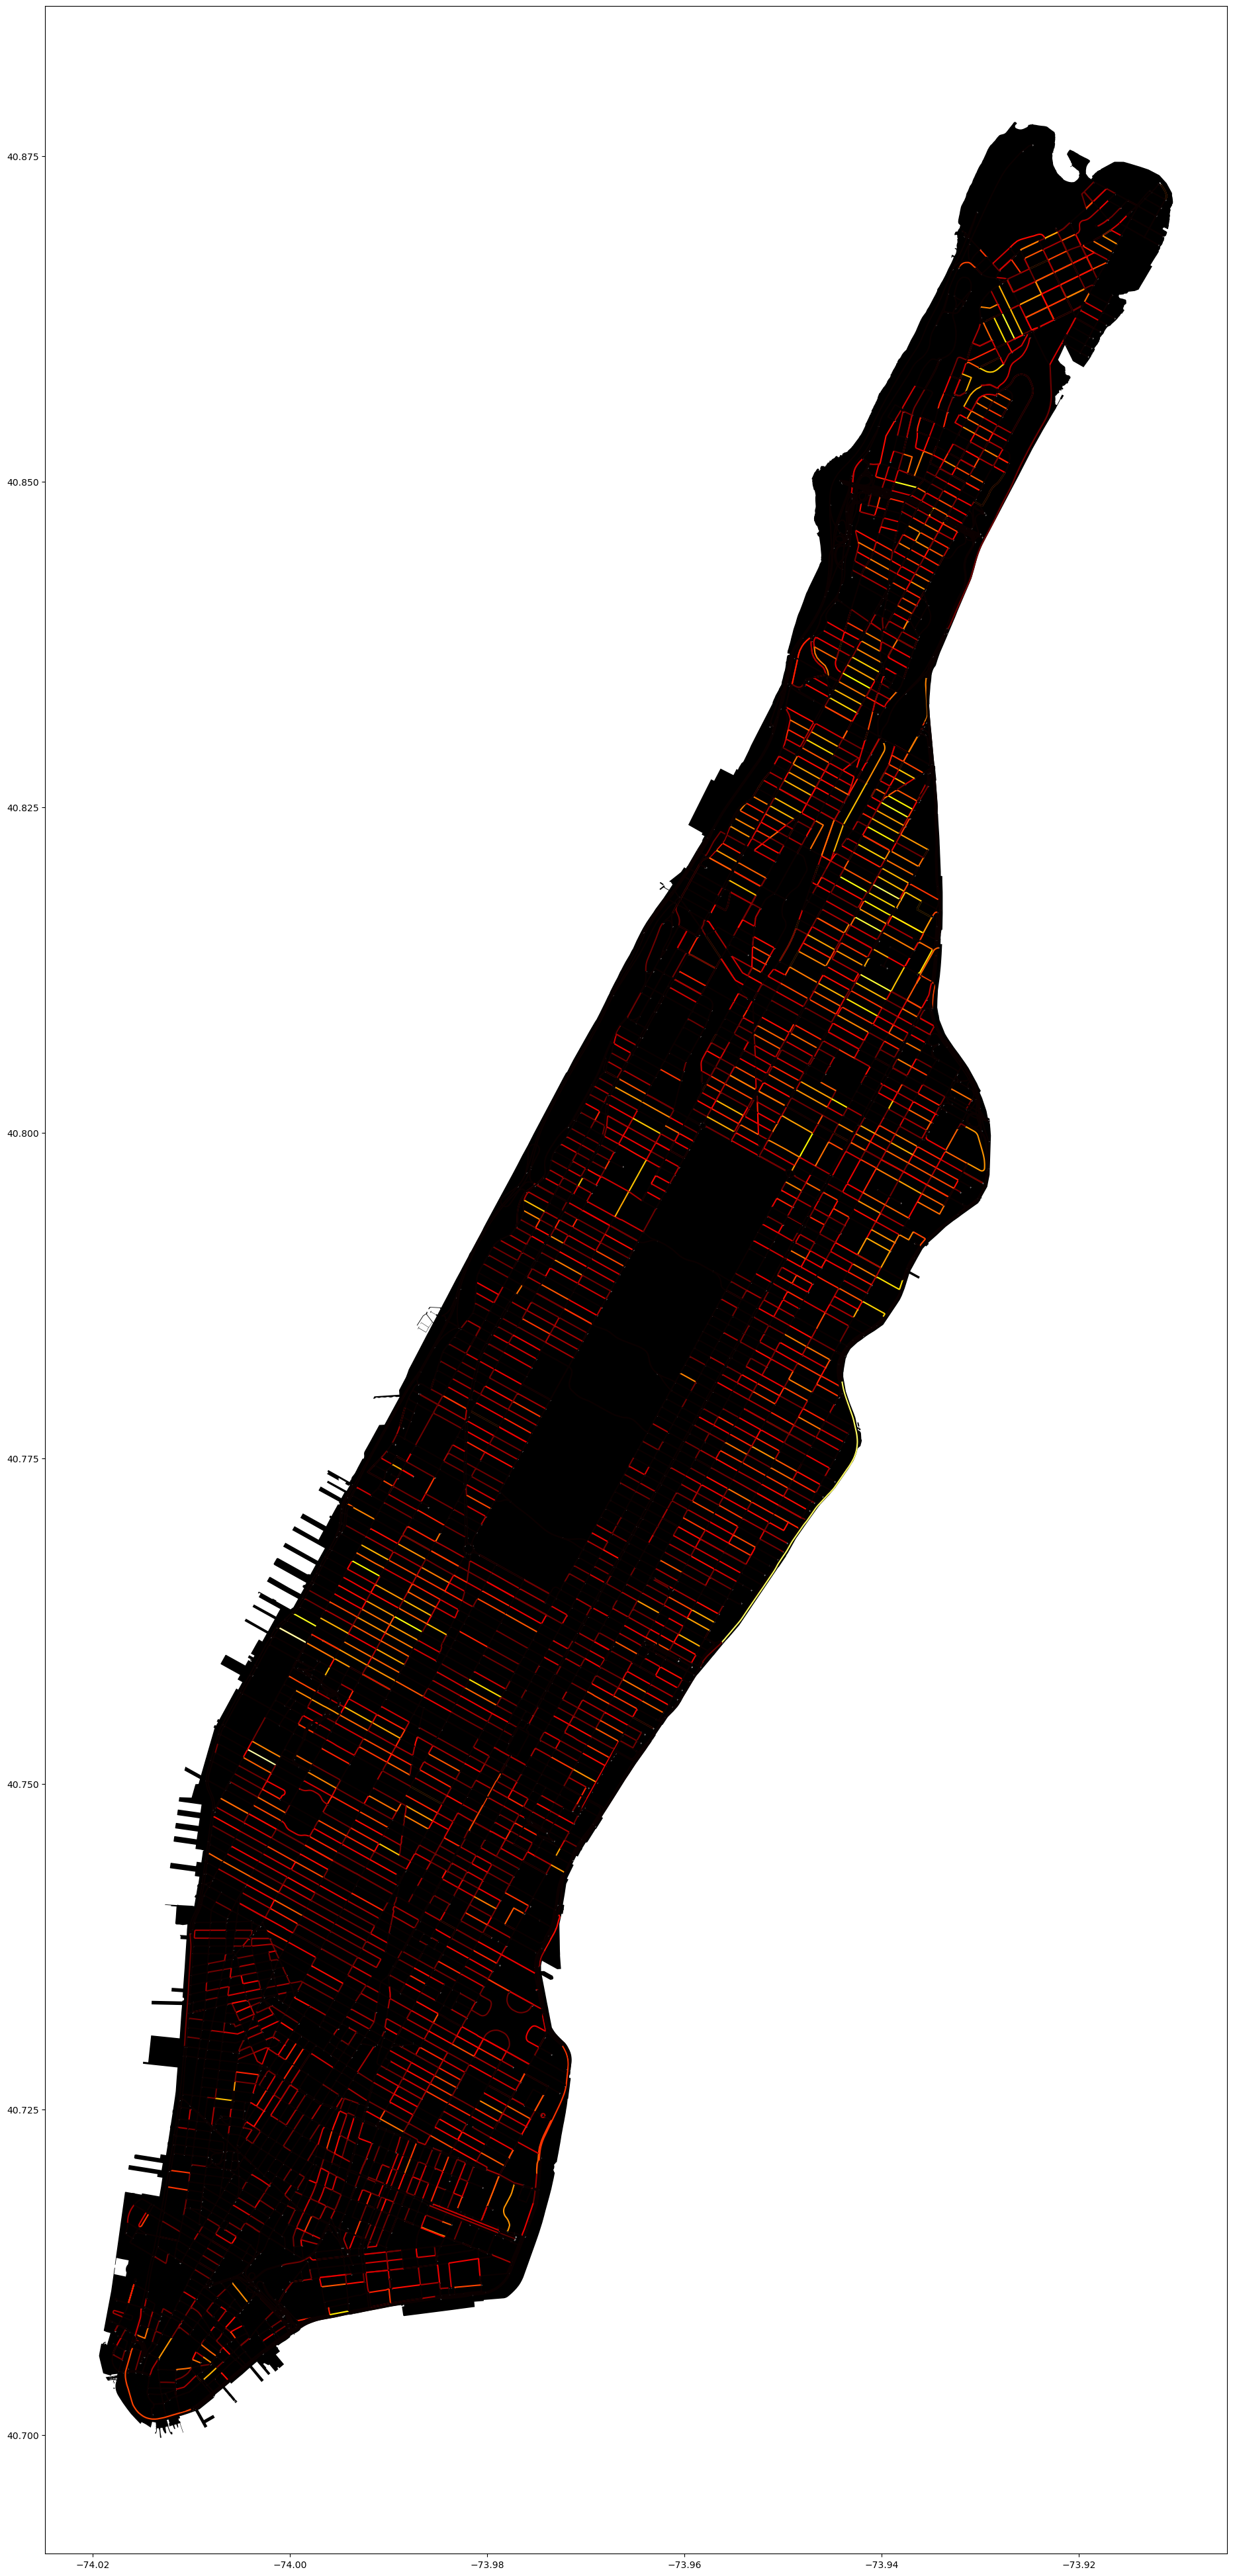

In [186]:
fig, ax = plt.subplots(figsize=(30,50))
area.plot(ax = ax, facecolor = 'black')
edges.plot(ax = ax, column = 'normalized evictions', cmap = 'hot', linewidth = 1.5)
nodes.plot(ax= ax, color = 'white', markersize = .1)
# property_gdf.plot(ax= ax,  markersize = 0.5, color = 'blue')

plt.show()

PROPERTY GRAPH

In [176]:
property_data = open(r'C:\Users\jfoo\Desktop\MACAD\03_AIA\01_GRAPHML\cleaned_property_data.csv')
property_df = pd.read_csv(property_data)


In [152]:
geometry = gpd.points_from_xy(property_df['Longitude'], property_df['Latitude'])
property_gdf = gpd.GeoDataFrame(property_df, geometry= geometry)
property_gdf.set_crs(epsg= 4326)

Unnamed: 0        BBLE  BORO  BLOCK   LOT EASEMENT  \
0              3514  1009281654     1    928  1654      NaN   
1              3519  1009281661     1    928  1661      NaN   
2              3544  1010511417     1   1051  1417      NaN   
3              7066  1006371201     1    637  1201      NaN   
4             10598  1002791006     1    279  1006      NaN   
...             ...         ...   ...    ...   ...      ...   
1341054     8925107  1019480024     1   1948    24      NaN   
1341055     8925108  1021440003     1   2144     3      NaN   
1341056     8925110  1021410029     1   2141    29      NaN   
1341057     8925111  1020251006     1   2025  1006      NaN   
1341058     8925112  1021100018     1   2110    18      NaN   

                         OWNER BLDGCL TAXCLASS  LTFRONT  ...    Borough  \
0                          NaN     R4        2        0  ...  MANHATTAN   
1                          NaN     R4        2        0  ...  MANHATTAN   
2                          NaN     R4        2        0  ...  MANHATTAN   
3                          NaN     R8       2C        0  ...  MANHATTAN   
4                  U CHOI WONG     R1       2C        0  ...  MANHATTAN   
...                        ...    ...      ...      ...  ...        ...   
1341054  510 MANHATTAN AFFORDA     G7        4       25  ...  MANHATTAN   
1341055  45 & 47 WADWORTH AVEN     I9        4       50  ...  MANHATTAN   
1341056        THE ASCONIA LLC     D7        2      139  ...  MANHATTAN   
1341057  VAZQUEZ, DANIEL CASAN     R2        2       72  ...  MANHATTAN   
1341058  432-434 WEST 163RD ST     C1        2       50  ...  MANHATTAN   

          Latitude  Longitude  Community Board  Council District  \
0        40.736451 -73.978732            106.0               2.0   
1        40.736451 -73.978732            106.0               2.0   
2        40.759212 -73.994510            104.0               3.0   
3        40.735330 -74.009670            102.0               3.0   
4        40.712189 -73.997843            103.0               1.0   
...            ...        ...              ...               ...   
1341054  40.807889 -73.953676            110.0               9.0   
1341055  40.846186 -73.937623            112.0              10.0   
1341056  40.843846 -73.938775            112.0              10.0   
1341057  40.818687 -73.941926            110.0               9.0   
1341058  40.835993 -73.938142            112.0              10.0   

         Census Tract        BIN                                NTA  \
0                64.0  1086124.0                           Gramercy   
1                64.0  1086124.0                           Gramercy   
2               115.0  1088437.0                            Clinton   
3                75.0  1012003.0                       West Village   
4                27.0  1003389.0                          Chinatown   
...               ...        ...                                ...   
1341054         257.0  1000000.0               Central Harlem South   
1341055         263.0  1089928.0           Washington Heights South   
1341056         253.0  1063463.0           Washington Heights South   
1341057         230.0  1060373.0  Central Harlem North-Polo Grounds   
1341058       24301.0  1062592.0           Washington Heights South   

             New Georeferenced Column                    geometry  
0        POINT (-73.978732 40.736451)  POINT (-73.97873 40.73645)  
1        POINT (-73.978732 40.736451)  POINT (-73.97873 40.73645)  
2         POINT (-73.99451 40.759212)  POINT (-73.99451 40.75921)  
3          POINT (-74.00967 40.73533)  POINT (-74.00967 40.73533)  
4        POINT (-73.997843 40.712189)  POINT (-73.99784 40.71219)  
...                               ...                         ...  
1341054  POINT (-73.953676 40.807889)  POINT (-73.95368 40.80789)  
1341055  POINT (-73.937623 40.846186)  POINT (-73.93762 40.84619)  
1341056  POINT (-73.938775 40.843846)  POINT (-73.93878 40.84385)  
1

In [153]:
nearest_edges = ox.distance.nearest_edges(G, property_gdf['geometry'].x, property_gdf['geometry'].y)
edge_values = {edge: [] for edge in nearest_edges}

In [154]:
nodes, edges = ox.graph_to_gdfs(G)
edges.head()

osmid               name  \
u        v        key                                                       
42421728 42435337 0                          195743153  Central Park West   
         42421731 0    [420625565, 420625573, 5668966]  West 106th Street   
         42432736 0           [1271523197, 1271523198]  Central Park West   
42435337 42437916 0                            5670640  West 105th Street   
         42421728 0                          195743153  Central Park West   

                           highway maxspeed  oneway reversed   length  \
u        v        key                                                   
42421728 42435337 0      secondary   25 mph   False     True   85.345   
         42421731 0      secondary      NaN   False    False  138.033   
         42432736 0      secondary   25 mph   False    False   86.274   
42435337 42437916 0    residential   25 mph    True    False  137.996   
         42421728 0      secondary   25 mph   False    False   85.345   

                                                                geometry  \
u        v        key                                                      
42421728 42435337 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...   
         42421731 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
         42432736 0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
42435337 42437916 0    LINESTRING (-73.96053 40.79738, -73.96065 40.7...   
         42421728 0    LINESTRING (-73.96053 40.79738, -73.96049 40.7...   

                       evictions lanes  ref access junction bridge tunnel  \
u        v        key                                                       
42421728 42435337 0            0   NaN  NaN    NaN      NaN    NaN    NaN   
         42421731 0            3   NaN  NaN    NaN      NaN    NaN    NaN   
         42432736 0            1   NaN  NaN    NaN      NaN    NaN    NaN   
42435337 42437916 0            3     1  NaN    NaN      NaN    NaN    NaN   
         42421728 0            0   NaN  NaN    NaN      NaN    NaN    NaN   

                      width  
u        v        key        
42421728 42435337 0     NaN  
         42421731 0     NaN  
         42432736 0     NaN  
42435337 42437916 0     NaN  
         42421728 0     NaN

In [155]:
for i, edge in enumerate(nearest_edges):
    edge_values[edge].append(property_gdf.iloc[i]['AVTOT'])

In [156]:
print(list(islice(edge_values.items(), 1)))

[((387184869, 42448707, 0), [113101, 113101, 140891, 346995, 134110, 140891, 131724, 369812, 284502, 149120, 131724, 133017, 476674, 291817, 225955, 396665, 119479, 136854, 134110, 140891, 131724, 136854, 119479, 119479, 134110, 133017, 208023, 217725, 217725, 225955, 131724, 208202, 204187, 51747, 131724, 149120, 119479, 225955, 136854, 134110, 217725, 1089290, 119479, 133017, 217725, 119479, 134110, 217725, 136854, 134110, 119479, 2107800, 424656, 100470, 225955, 134110, 140891, 140891, 119479, 136854, 133017, 136854, 51747, 180033, 225955, 204187, 133017, 234007, 54039, 136854, 119479, 180033, 133017, 217725, 225955, 134110, 140891, 145998, 119479, 131724, 400680, 140891, 131724, 134110, 217725, 225955, 401594, 134110, 52886, 204187, 56326, 225955, 182597, 136854, 140891, 131724, 217725, 133017, 208023, 225955, 54037, 208023, 217725, 56326, 225955, 182597, 136854, 119479, 217725, 131724, 225955, 133017, 140891, 136854, 140891, 100470, 225955, 142340, 131724, 131724, 149120, 136854, 

In [157]:
for edge, values in edge_values.items():
    avg_value = np.mean(values)
    u, v, key = edge
    edges.loc[(u,v,key), 'Average Value'] = avg_value

edges = edges.fillna(0)

C:\Users\jfoo\AppData\Local\Temp\ipykernel_33276\274955595.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  edges.loc[(u,v,key), 'Average Value'] = avg_value
C:\Users\jfoo\AppData\Local\Temp\ipykernel_33276\274955595.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  edges.loc[(u,v,key), 'Average Value'] = avg_value
C:\Users\jfoo\AppData\Local\Temp\ipykernel_33276\274955595.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  edges.loc[(u,v,key), 'Average Value'] = avg_value
C:\Users\jfoo\AppData\Local\Temp\ipykernel_33276\274955595.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  edges.loc[(u,v,key), 'Average Value'] = avg_value
C:\Users\jfoo\AppData\Local\Temp\ipykernel_33276\274955595.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  edges.loc[(u,v,key), 'Average Value'] = avg_value
C:\Users\jfoo\AppData\Local\Temp\ipykernel_33276\274955

In [158]:
non_zero = edges[edges['Average Value']>0]
min_non_zero = non_zero['Average Value'].min
min_non_zero


<bound method Series.min of u           v           key
42421728    42421731    0      1.020108e+05
            42432736    0      1.260371e+05
42435337    42437916    0      1.077599e+05
            42421728    0      1.468919e+05
            42435336    0      9.430400e+06
                                   ...     
7802856341  7802856352  0      1.290758e+07
7802856372  42443329    0      8.683408e+05
            7802856349  0      1.357805e+07
8840333851  42453952    0      7.934890e+07
            42428391    0      2.713570e+06
Name: Average Value, Length: 6450, dtype: float64>

In [159]:
log_weights = np.log(edges['Average Value'] + 1)
norm_weights = (log_weights - log_weights.min()) / (log_weights.max() - log_weights.min())
edges['Normalized Average Value'] = norm_weights
non_zero_edges = edges[edges['Normalized Average Value'] > 0]

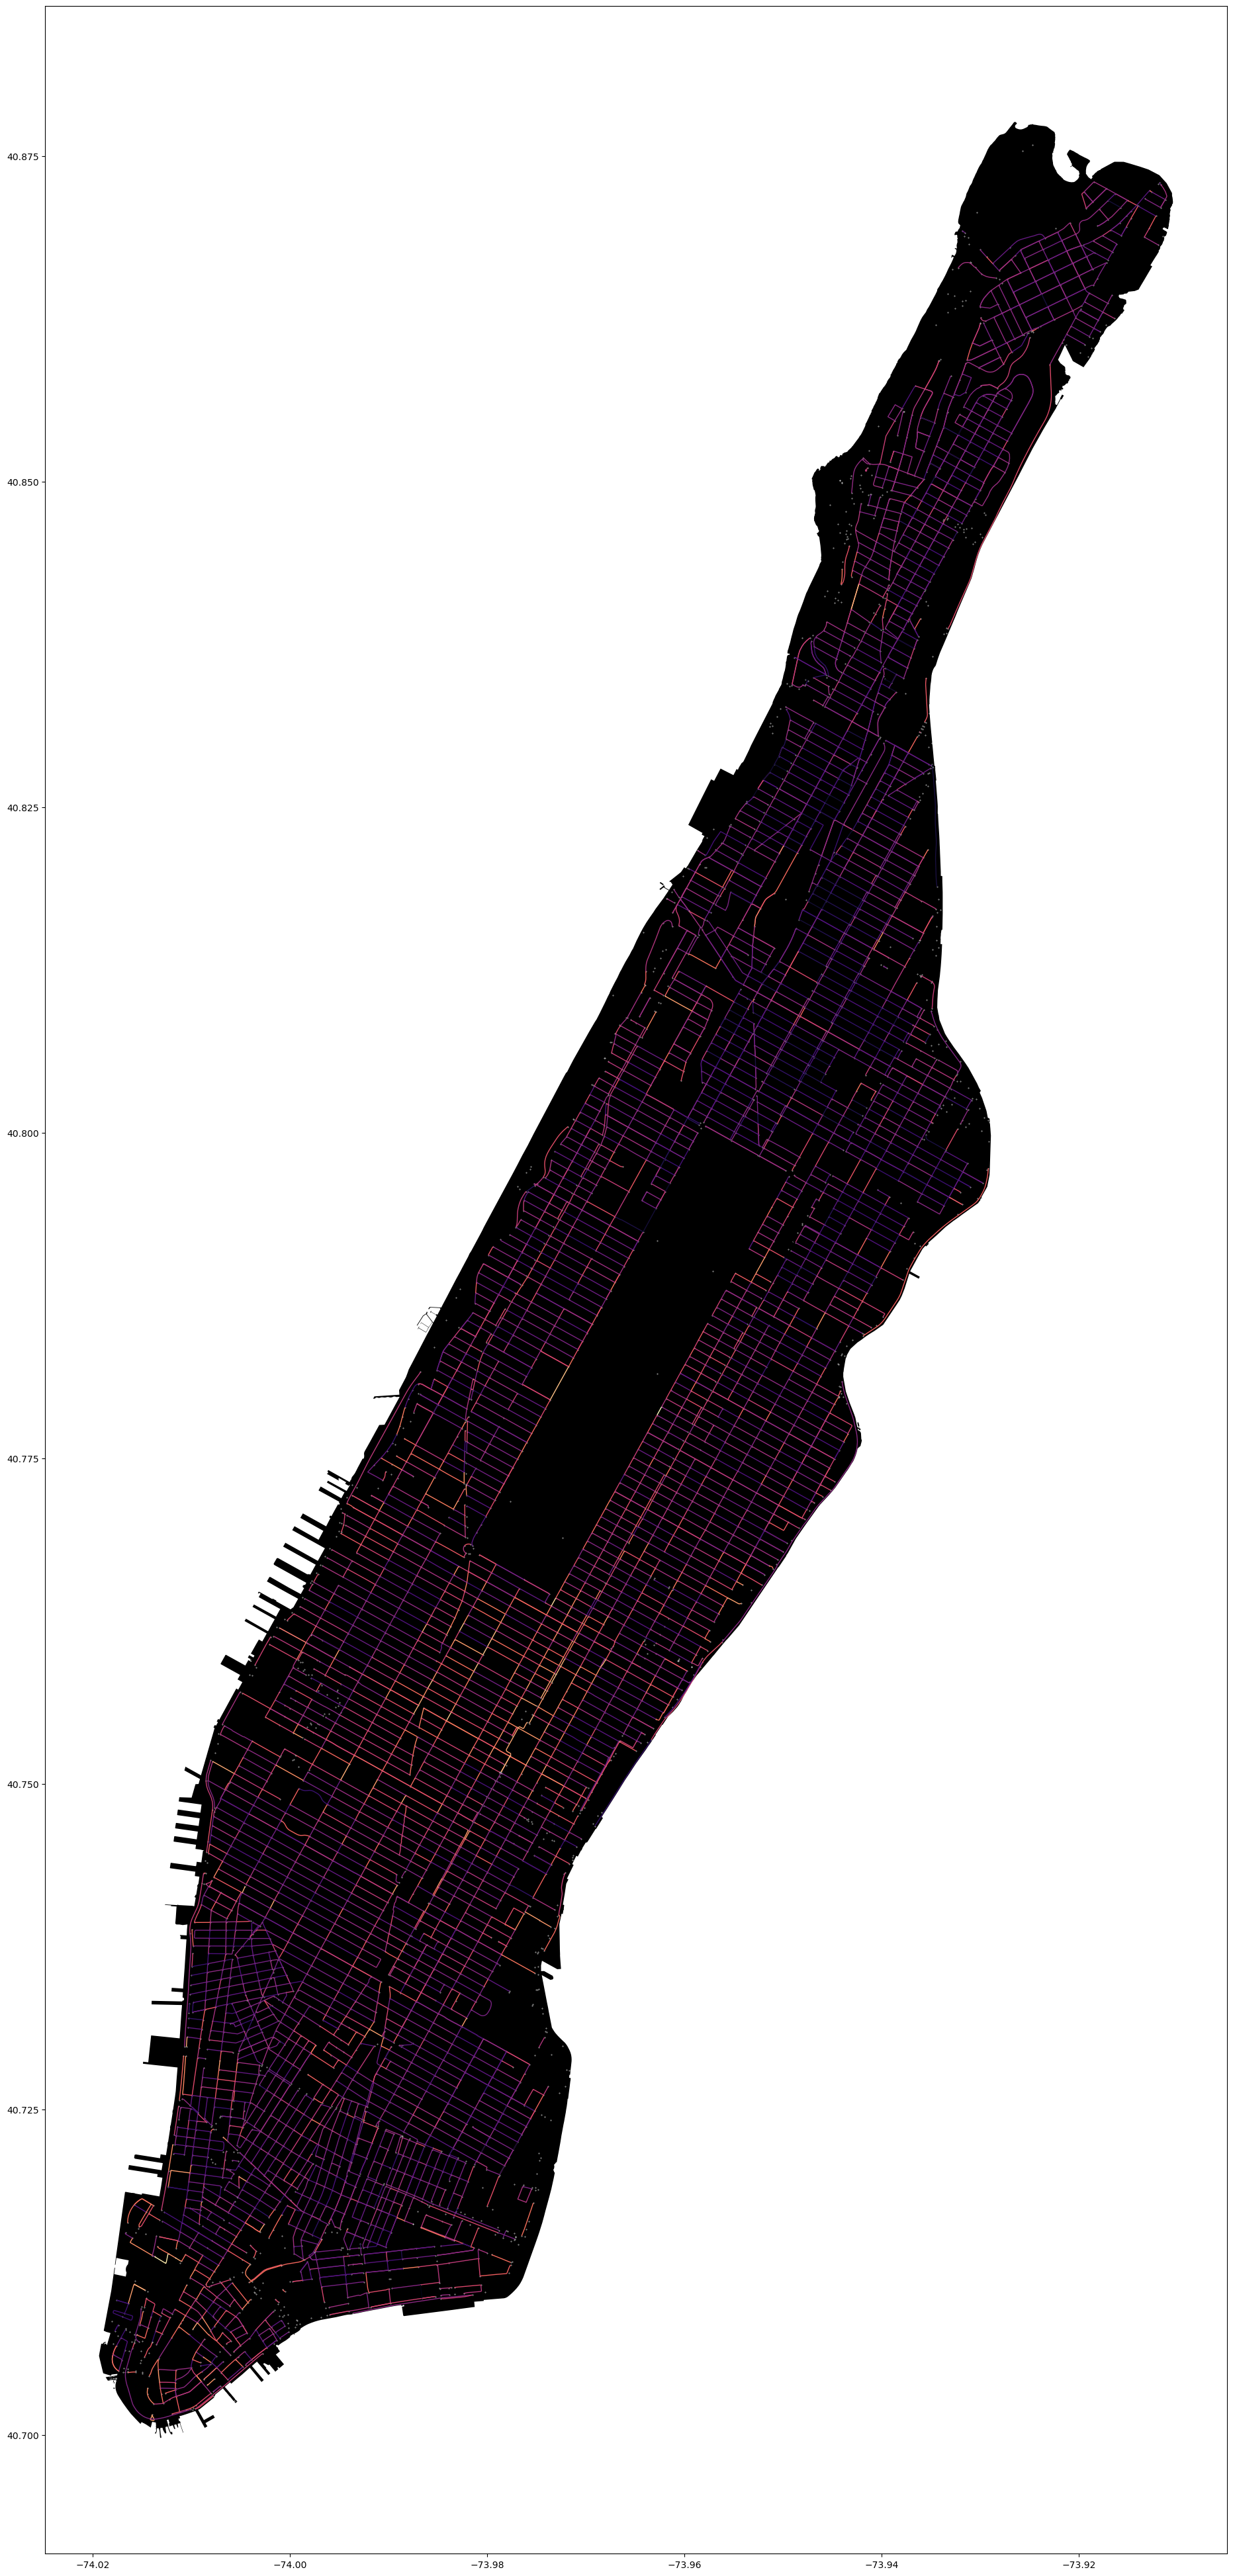

In [160]:
fig, ax = plt.subplots(figsize=(30,50))
area.plot(ax = ax, facecolor = 'black')
non_zero_edges.plot(ax = ax, column = 'Normalized Average Value', cmap = 'magma', linewidth = 1)
nodes.plot(ax= ax, color = 'white', markersize = .1)
# property_gdf.plot(ax= ax,  markersize = 0.5, color = 'blue')

plt.show()

RENT

FEATURE ANALYSIS

In [161]:
import phik
from phik.report import plot_correlation_matrix
from phik import report
import seaborn as sns
import warnings

In [177]:
edges.head()

osmid               name  \
u        v        key                                                       
42421728 42435337 0                          195743153  Central Park West   
         42421731 0    [420625565, 420625573, 5668966]  West 106th Street   
         42432736 0           [1271523197, 1271523198]  Central Park West   
42435337 42437916 0                            5670640  West 105th Street   
         42421728 0                          195743153  Central Park West   

                           highway maxspeed  oneway reversed   length  \
u        v        key                                                   
42421728 42435337 0      secondary   25 mph   False     True   85.345   
         42421731 0      secondary        0   False    False  138.033   
         42432736 0      secondary   25 mph   False    False   86.274   
42435337 42437916 0    residential   25 mph    True    False  137.996   
         42421728 0      secondary   25 mph   False    False   85.345   

                                                                geometry  \
u        v        key                                                      
42421728 42435337 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...   
         42421731 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
         42432736 0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
42435337 42437916 0    LINESTRING (-73.96053 40.79738, -73.96065 40.7...   
         42421728 0    LINESTRING (-73.96053 40.79738, -73.96049 40.7...   

                       evictions lanes ref access junction bridge tunnel  \
u        v        key                                                      
42421728 42435337 0            0     0   0      0        0      0      0   
         42421731 0            3     0   0      0        0      0      0   
         42432736 0            1     0   0      0        0      0      0   
42435337 42437916 0            3     1   0      0        0      0      0   
         42421728 0            0     0   0      0        0      0      0   

                      width  Average Value  Normalized Average Value  \
u        v        key                                                  
42421728 42435337 0       0       0.000000                  0.000000   
         42421731 0       0  102010.825397                  0.544653   
         42432736 0       0  126037.125413                  0.554641   
42435337 42437916 0       0  107759.857143                  0.547243   
         42421728 0       0  146891.866887                  0.561873   

                       normalized evictions  
u        v        key                        
42421728 42435337 0                0.000000  
         42421731 0                0.294359  
         42432736 0                0.147180  
42435337 42437916 0                0.294359  
         42421728 0                0.000000

In [179]:
attributes_to_check = ['Normalized Average Value', 'normalized evictions']
data_to_check = edges[attributes_to_check]

interval columns not set, guessing: ['Normalized Average Value', 'normalized evictions']


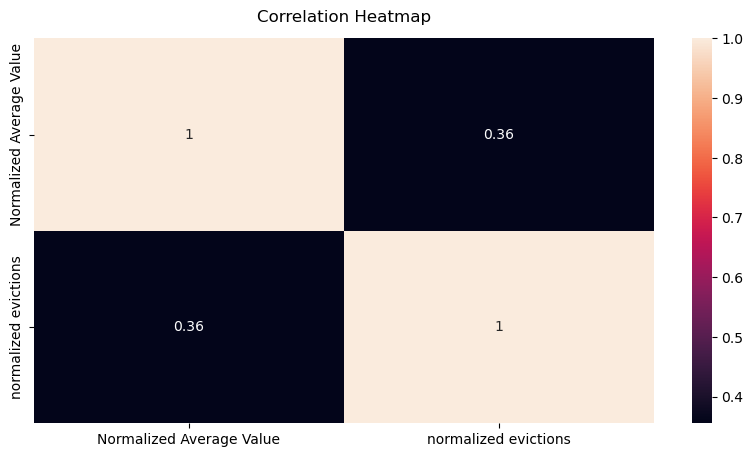

In [180]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data_to_check.phik_matrix(), annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);